**INTRODUCTION**

We have a data which classifies if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

['heart.csv']


**Read Data**

In [2]:
df=pd.read_csv('../input/heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


**Data Exploration**

In [3]:
print (df.target.value_counts())

1    165
0    138
Name: target, dtype: int64


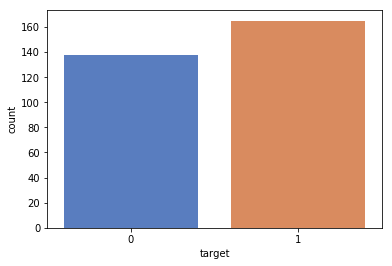

In [4]:
sns.countplot(x="target", data=df, palette="muted")
plt.savefig('CountOfDisease.png')
plt.show()

In [5]:
disTrue=len(df[df.target==1])
disFalse=len(df[df.target==0])
print ("Percentage of people having heart disease is:  %.2f" %((disTrue*100)/len(df.target)))
print ("Percentage of people not having heart disease is:  %.2f" %((disFalse*100)/len(df.target)))

Percentage of people having heart disease is:  54.46
Percentage of people not having heart disease is:  45.54


In [6]:
MalePatient=len(df[df.sex==1])
FemPatient=len(df[df.sex==0])
print ("percentage of Male patients is:  %.2f" %((MalePatient*100)/len(df.sex)) + "%")
print ("percentage of Female patients is:  %.2f" %((FemPatient*100)/len(df.sex)) + "%")

percentage of Male patients is:  68.32%
percentage of Female patients is:  31.68%


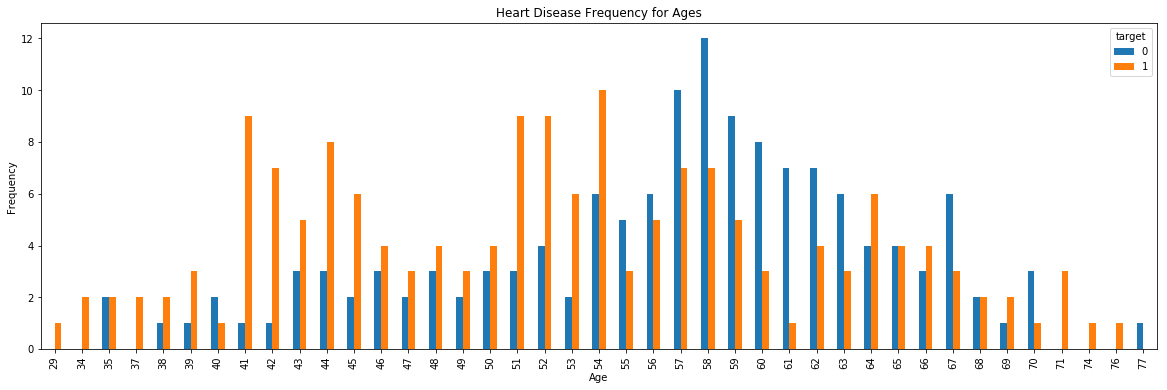

In [7]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

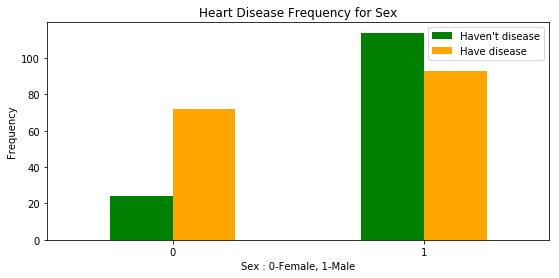

In [8]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(9,4),color=("green","orange"))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex : 0-Female, 1-Male')
plt.xticks(rotation=0)
plt.legend(["Haven't disease","Have disease"])
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndSex.png')
plt.show()

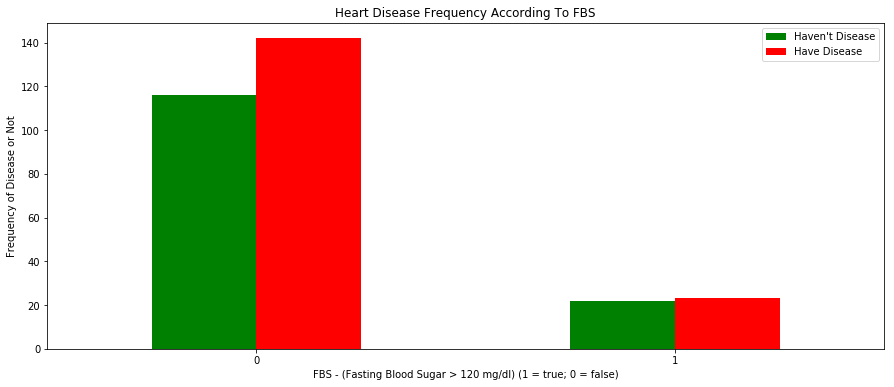

In [9]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['green','red' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.savefig('heartDiseaseAndFBS.png')
plt.show()

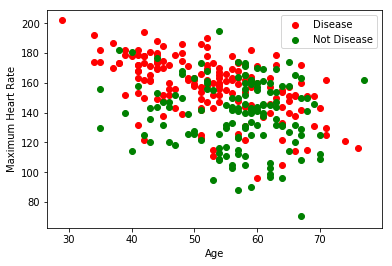

In [10]:
plt.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1],color="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)],color="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.savefig('heartrateANDage.png')
plt.show()

In [11]:
x_data = df.drop(['target'], axis = 1)
y_data = df.target.values

**Train Test Split**

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.2)

**Normalize Data**

In [13]:
x_train=(x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train)).values
x_test=(x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test)).values

**Logistic Regression**

In [14]:
logRegr=LogisticRegression()
logRegr.fit(x_train,y_train)
print("Test Accuracy {:.2f}%".format(logRegr.score(x_test,y_test)*100))

Test Accuracy 78.69%


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**K-Nearest Neighbour (KNN) Classification**

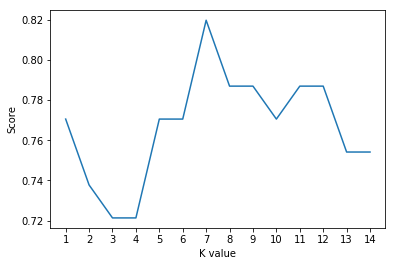

Maximum KNN Score is:  81.97


In [15]:
from sklearn.neighbors import KNeighborsClassifier
scoreList = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    scoreList.append(knn.score(x_test, y_test))
    
plt.plot(range(1,15), scoreList)
plt.xticks(np.arange(1,15,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


print("Maximum KNN Score is:  %.2f" %((max(scoreList))*100))

**Support Vector Machine (SVM)**

In [16]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
print("Test Accuracy of SVM Algorithm:  %.2f" %(clf.score(x_test,y_test)*100))

Test Accuracy of SVM Algorithm:  81.97


**Decision Tree**

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Decision Tree Test Accuracy:  %.2f" %(dtc.score(x_test, y_test)*100))

Decision Tree Test Accuracy:  72.13


**Naive Bayes Algorithm**

In [19]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Accuracy of Naive Bayes:  %.2f" %(nb.score(x_test,y_test)*100))

Accuracy of Naive Bayes:  78.69


**Random Forest Classification**

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
print("Random Forest Algorithm Accuracy Score : %.2f" %(rf.score(x_test,y_test)*100))

Random Forest Algorithm Accuracy Score : 75.41


**Comparing Models**

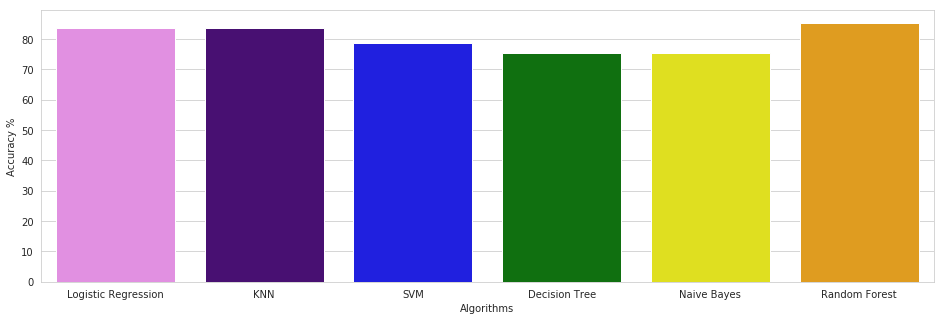

In [21]:
methods = ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Naive Bayes", "Random Forest"]
accuracy = [83.61, 83.61, 78.69, 75.41, 75.41, 85.25]
colors = ["violet", "indigo", "blue", "green","yellow","orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

Our models work fine but best of them is Random Forest with 85.25% of accuracy. Let's look their confusion matrixes.

**Confusion Matrix**

In [22]:
# Predicted values
y_head_lr = logRegr.predict(x_test)
knn7 = KNeighborsClassifier(n_neighbors = 7)
knn7.fit(x_train, y_train)
y_head_knn = knn7.predict(x_test)
y_head_svm = clf.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

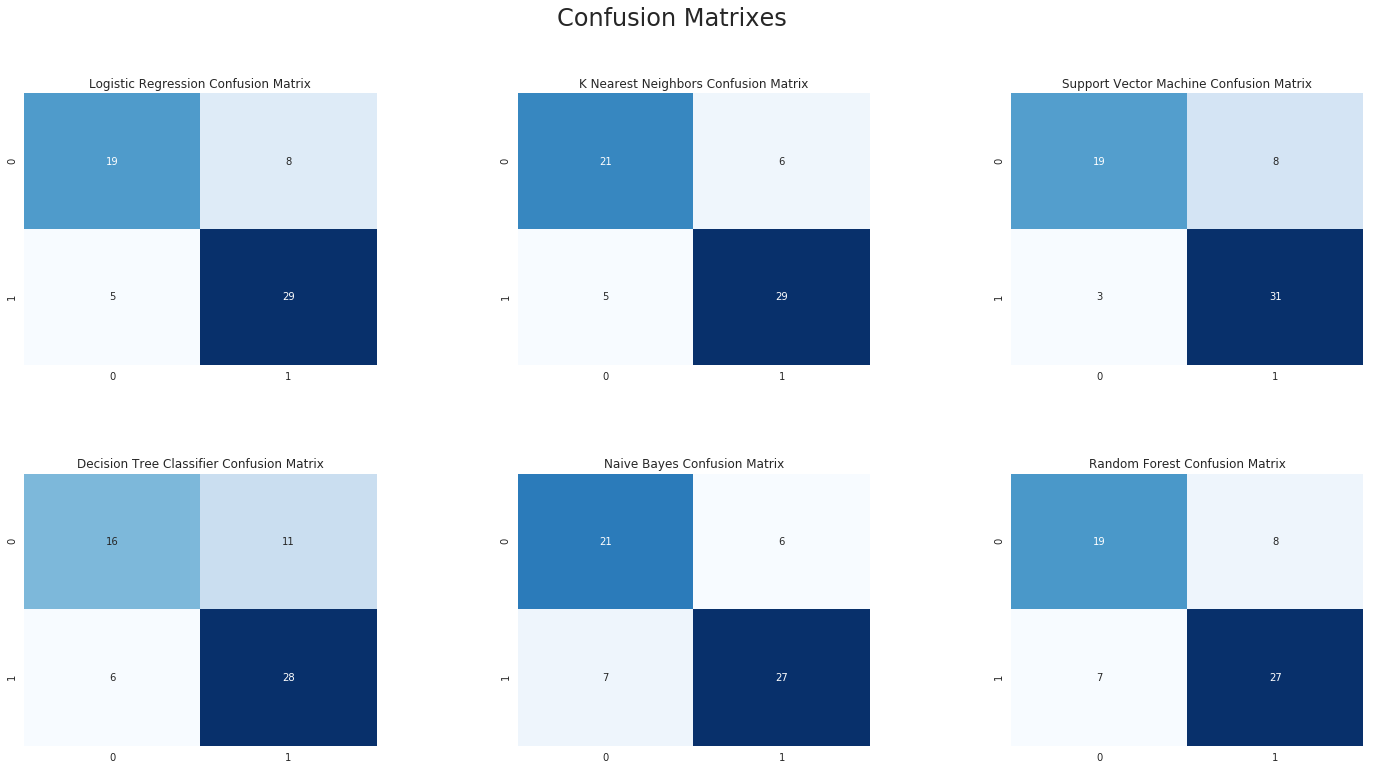

In [24]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,4)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,5)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.show()